<h2>1° Importando Libs e Declarando Listas e Variáveis</h2>

In [1]:
import datetime
from collections import Counter
import collections
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

lista_hora = []
lista_dia_semana = []
lista_datas = []
lista_erros = []
lista_pessoas = []
lista_mensagens = []
lista_nulos = []

<h2>2° Tratamento do Arquivo</h2>

In [2]:
def analise_arquivo(nm_arquivo):
    arquivo = open(nm_arquivo, "r", encoding='utf-8')

    linha = arquivo.readline()

    while linha:
        linha = arquivo.readline()
        try:
            data_hora = datetime.datetime.strptime(linha[1:7] + '20' + linha[7:18], '%d/%m/%Y %H:%M:%S')
            lista_datas.append(data_hora)
            mensagem = linha[20:]
            if(linha[0:1] + linha[18:19] == '[]' or linha[20:24] == '+55'):
                if(len(mensagem.split(':')) >= 2):
                        lista_pessoas.append(mensagem.split(':')[0])
                        lista_mensagens.append(mensagem.split(':')[1])
            else:
                lista_mensagens.append(linha)    
        except ValueError:
            lista_erros.append('Erros de formatação de data' + linha)

    arquivo.close()
 

analise_arquivo('chat.txt')

<h2>3° Palavras Mais Usadas</h2>

<AxesSubplot:title={'center':'Palavras Mais Usadas'}, xlabel='Palavra'>

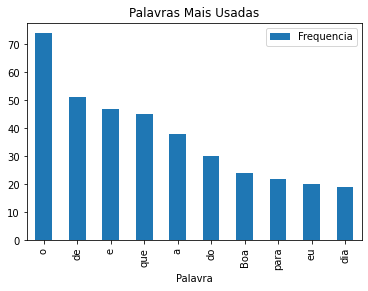

In [8]:
def conta_palavras(msgs):
    palavras = []
    for frases in msgs:
        for palavra in frases.split():
            palavras.append(palavra)
    return Counter(palavras)

palavras_dict = dict(conta_palavras(lista_mensagens))
df_palavras = pd.DataFrame(palavras_dict.items(), columns=['Palavra', 'Frequencia'])
df_palavras_2 = df_palavras.sort_values(by=['Frequencia'], ascending=False)
df_palavras_2.head(10).plot(kind='bar', 
                          x = 'Palavra', 
                          y='Frequencia', 
                          title='Palavras Mais Usadas')

<h2>4° Dias Mais Falados - Semana</h2>

<AxesSubplot:title={'center':'Dias Mais Falados - Semana'}, xlabel='Dia_Semana'>

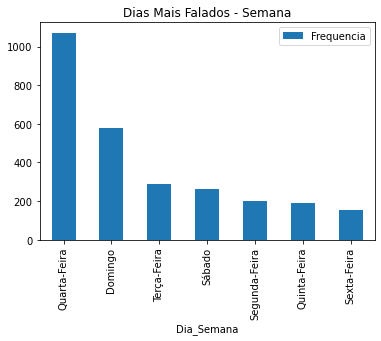

In [9]:
dia_da_semana = {0: "Domingo",
                 1: "Segunda-Feira",
                 2: "Terça-Feira",
                 3: "Quarta-Feira",
                 4: "Quinta-Feira",
                 5: "Sexta-Feira",
                 6: "Sábado"}
 

for data in lista_datas:
    lista_hora.append(data.time().hour)
    
    lista_dia_semana.append(dia_da_semana.get(data.weekday()))
    
    if(data.weekday() == 1):
        lista_dia_semana.append('Segunda-Feira')
    elif(data.weekday() == 2):
        lista_dia_semana.append('Terça-Feira')
    elif(data.weekday() == 3):
        lista_dia_semana.append('Quarta-Feira')
    elif(data.weekday() == 4):
        lista_dia_semana.append('Quinta-Feira')
    elif(data.weekday() == 5):
        lista_dia_semana.append('Sexta-Feira')
    elif(data.weekday() == 6):
        lista_dia_semana.append('Sábado')
    elif(data.weekday() == 0):
        lista_dia_semana.append('Domingo')

        
count_dia_semana = dict(Counter(lista_dia_semana))
df_semana = pd.DataFrame(count_dia_semana.items(),columns=['Dia_Semana','Frequencia'])
df_semana_2 = df_semana.sort_values(by=['Frequencia'], ascending=False)
df_semana_2.plot(kind='bar', 
                 x = 'Dia_Semana', 
                 y='Frequencia', 
                 title='Dias Mais Falados - Semana')

<h2>5° Hora Mais Falada e Menos Falada</h2>

<AxesSubplot:title={'center':'Horário Mais Falado'}, xlabel='Hora'>

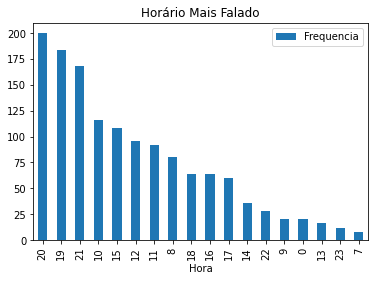

In [26]:
count_horas = dict(Counter(lista_hora))
df_horas = pd.DataFrame(count_horas.items(), columns=['Hora', 'Frequencia'])
df_horas = df_horas.sort_values(by=['Frequencia'], ascending=False)

df_horas.plot(kind='bar', 
              x = 'Hora', 
              y='Frequencia', 
              title='Horário Mais Falado')